## GIS Data Science
#### Data Science for Climate in Nepal

**Objective**
- Objective of the study is to analyze and get insights from GIS data of Nepal

In [ ]:
#pip install -r requirements.txt

In [ ]:
# import required Python libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import fiona
import rasterio
from rasterio.mask import mask


In [ ]:
# Load a shapefile data
path = r"Datasets/Vector/Shape_Data/local_unit.shp"
# Reading a shapefile data
gdf = gpd.read_file(path)


# Data Preliminary Check for Descriptive Statistics

In [33]:
print('CRS: ')
print(gdf.crs)

# Display the first few rows
print("Head: ")
print(gdf.head())

print('Geometry: ')
print(gdf.geometry)

#check for missing values
print('check for missing values')
print(gdf.isnull().sum())

#describe the date properties
print('Describe the date properties')
print(gdf.describe())
# Count unique State Code
print('Count unique State Code')
print(gdf["STATE_CODE"].value_counts().sort_index())

CRS: 
GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Head: 
   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  
Geometry: 
0      POL

# Visualization of Spatial Distribution


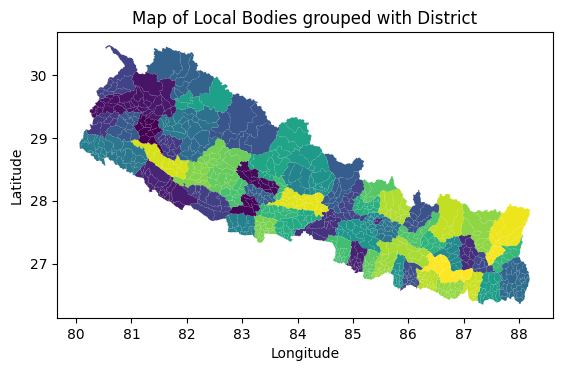

In [ ]:
# Plot vector data
gdf.plot(column="DISTRICT", cmap="viridis")
plt.title("Map of Local Bodies marked with District")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

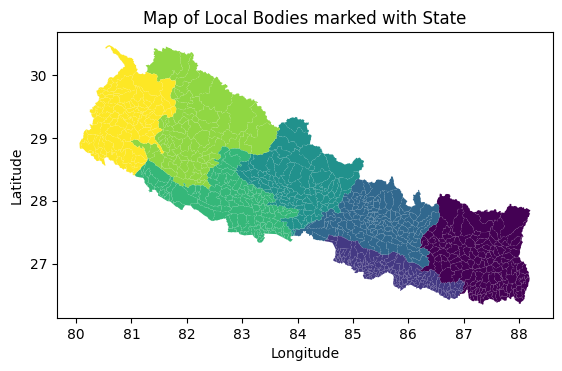

In [44]:
# Plot vector data
gdf.plot(column="STATE_CODE", cmap="viridis")
plt.title("Map of Local Bodies marked with State")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

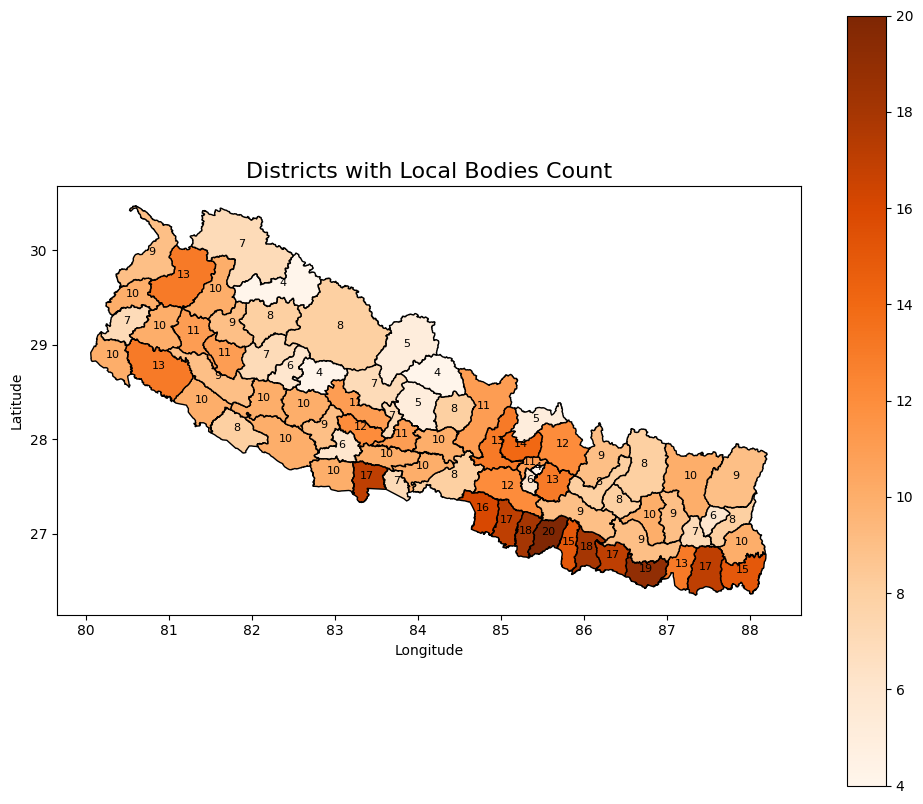

In [45]:
# Group by district and count local bodies
local_body_by_district = gdf.groupby("DISTRICT").size().reset_index(name="local_body_count")
# Merge count data back into the GeoDataFrame
local_bodies_with_counts = gdf.merge(local_body_by_district, on="DISTRICT", how="left")

# Dissolve local bodies into districts to create district-level geometries
districts = local_bodies_with_counts.dissolve(by="DISTRICT", as_index=False, aggfunc="first")

#print(districts)


# Add the local body count to the dissolved districts GeoDataFrame
districts["local_body_count"] = local_body_by_district["local_body_count"]

# Plot the districts and annotate counts
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot districts with a color gradient based on local body count
districts.plot(ax=ax, column="local_body_count", cmap="Oranges", legend=True, edgecolor="black")

# Add count labels on district centroids
for idx, row in districts.iterrows():
    centroid = row["geometry"].centroid
    ax.text(centroid.x, centroid.y, str(row["local_body_count"]), fontsize=8, ha="center", color="black")

# Customize plot
ax.set_title("Districts with Local Bodies Count", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot
plt.show()



# Working with Raster Data

In [46]:
#define path for rater datasets
path_nepal_admin_regions = r"Datasets/Raster/nepal_climate_data/nepal_admin_regions.gpkg"
path_nepal_glaciers = r"Datasets/Raster/nepal_climate_data/nepal_glaciers.gpkg"
path_nepal_precipitation_2020 = r"Datasets/Raster/nepal_climate_data/nepal_precipitation_2020.tif"
path_nepal_precipitation_2050 = r"Datasets/Raster/nepal_climate_data/nepal_precipitation_2050.tif"
path_nepal_riers = r"Datasets/Raster/nepal_climate_data/nepal_rivers.gpkg"
path_nepal_temperature_2020 = r"Datasets/Raster/nepal_climate_data/nepal_temperature_2020.tif"
path_nepal_temperature_2050 = r"Datasets/Raster/nepal_climate_data/nepal_temperature_2050.tif"